# Extracting minor and major groove widths from 3DNA .out file and ploting the minor groove graph

In [46]:
# load libraries
import pandas as pd
import shutil
import os
import random
import matplotlib.pyplot as plt
import csv
from statistics import mean
import seaborn as sns
import numpy as np

# Define the required parameters and locations of files

In [55]:
# This part parses 3DNA out file to extract the groove width values.
# Please change the path of files and parameters with yours.

# Change the path of output files with yours.
outfiles=os.listdir("/Users/klab01/Desktop/github/Raw_Data/MinorGroove/Sox11_dyad_complex_sim1")
os.chdir("/Users/klab01/Desktop/github/Raw_Data/MinorGroove/Sox11_dyad_complex_sim1")

# Change the path of the reference file with yours
loc_ref=('/Users/klab01/Desktop/github/Raw_Data/MinorGroove/Reference/cryoem_dyad_min_max.minor')

sep_ref=";" #specify the column seperator of your reference file

 
color_minor='#e2ad3c' #specify the color to plot min and max lines of minor groove and fill between these values.
#601-SHL024(free nuc): #7b923c, dyad:#e2ad3c, SHL2: #d95e46, SHL4:#315356


color_ref='gray' #specify the color for your reference structure

xlabel="Sox:dyad" #enter xlabel of your plot
ylabel="MG Width ($\AA$)" #enter ylabel of your plot

fig_name="Sox11_dyad_mg" #enter the name of your plot to save


# Plot minor groove graphs

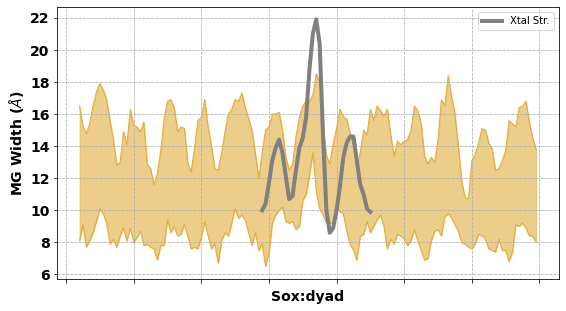

In [56]:
for a in range(0,len(outfiles)):
    if outfiles[a].endswith(".out"):
        with open (outfiles[a], "r") as x3dna:
            parameters=x3dna.readlines()

        top=parameters.index("                  Minor Groove        Major Groove\n") + 2
        bottom=parameters.index("Main chain and chi torsion angles: \n") - 4

        with open ("temp.csv", "a") as result:
            
            for i in range(top,bottom):
                    if not '---' in parameters[i]:
                        result.write(parameters[i].split()[0]+";"+parameters[i].split()[2]+";")
                        result.write(parameters[i].split()[4])
                        result.write("\n")     

with open ("gw_max_min.csv", "a") as header:
    header.write('index;minor_max;minor_min;minor_mean;major_max;major_min;major_mean\n')

    with open ("temp.csv", "r") as groove:
        parameters=groove.readlines()
for i in range(4,140):
    minor=[]
    major=[]

    for j in range(0,len(parameters)):
        if parameters[j].split(';')[0] == str(i):
            minor.append(float(parameters[j].split(';')[1]))
            major.append(float(parameters[j].split(';')[2]))
            
    with open ("gw_max_min.csv", "a") as max_min:
        max_min.write(str(i) + ';' + str(max(minor)) + ';' + str(min(minor)) + ';' + str(mean(minor)) + ';')
        max_min.write(str(max(major)) + ';' + str(min(major)) + ';' + str(mean(major)) + '\n')


os.remove("temp.csv")

a=pd.read_csv("gw_max_min.csv", sep=";")
b=pd.read_csv(loc_ref, sep=sep_ref) #xtal structure's base pair parameters
c=pd.DataFrame(a)

os.remove("gw_max_min.csv")

max_c=c['minor_max']
min_c=c['minor_min']
index_c=c['index']
minor_max_c=c['minor_max']

plt.figure(figsize=(9,5))

sns.lineplot(x="index", y="minor_max", linewidth=1, color=color_minor, data=a) #max
sns.lineplot(x="index", y="minor_min", linewidth=1, color=color_minor, data=a) #min
sns.lineplot(x="index", y="minor", label='Xtal Str.', color=color_ref, linewidth=4, markers=True, data=b) #xtal
plt.fill_between(index_c,max_c,min_c, color=color_minor, alpha=0.6)

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.xlabel(xlabel, fontsize=14, fontweight='bold')
plt.ylabel(ylabel, fontsize=14, fontweight='bold')
ax=plt.gca()
ax.set_xticklabels([])
plt.grid(linestyle='--')
plt.grid(True)
plt.savefig(fig_name + ".pdf",dpi=300,bbox_inches='tight',format="pdf")
plt.show()
